## Example script
Takes you through the basics of generating a lower resolution version of the paper's figures and simulations. 
#### Load dependencies

In [1]:
push!(LOAD_PATH, "../src/")
using Pairwise, Multiagent

#### Load problem constants

In [2]:
alphafile = "../data/alpha.jld"
d = get_pomdp()
g = get_grid(d.pomdp.states)
print("")  # suppress output

### Pairwise encounter
The code here generates the QMDP approximate solution to the pairwise encounter and visualizes the policy.
#### Solve for pairwise encounter policy
Generation of pairwise encounter policy takes a few minutes. Comment out `gen_pairwise_policy` line to use pre-computed policy datafile for the next part.

In [3]:
gen_pairwise_policy(d)
alpha = read_alpha(alphafile)
print("")  # suppress output

Running QMDP alpha vectors approximation...
lambda = 1.0
Iteration 1: residual = 9.32e+09, cputime = 4.54e+00
Iteration 2: residual = 5.27e+09, cputime = 4.45e+00
Iteration 3: residual = 2.18e+09, cputime = 5.25e+00
Iteration 4: residual = 1.15e+09, cputime = 7.24e+00
Iteration 5: residual = 5.54e+08, cputime = 4.66e+00
Iteration 6: residual = 2.67e+08, cputime = 4.35e+00
Iteration 7: residual = 1.28e+08, cputime = 4.37e+00
Iteration 8: residual = 6.18e+07, cputime = 5.87e+00
Iteration 9: residual = 2.91e+07, cputime = 4.84e+00
Iteration 10: residual = 1.38e+07, cputime = 4.49e+00
Iteration 11: residual = 6.62e+06, cputime = 4.38e+00
Iteration 12: residual = 3.15e+06, cputime = 4.80e+00
Iteration 13: residual = 1.49e+06, cputime = 4.89e+00
Iteration 14: residual = 7.39e+05, cputime = 4.40e+00
Iteration 15: residual = 3.83e+05, cputime = 4.20e+00
Iteration 16: residual = 2.01e+05, cputime = 4.09e+00
Iteration 17: residual = 1.09e+05, cputime = 4.27e+00
Iteration 18: residual = 5.99e+04,

#### Visualize policy as heatmap

Slider{Float64}([Input{Float64}] 180.0,"p",180.0,0.0:90.0:360.0)

Slider{Float64}([Input{Float64}] 15.0,"v0",15.0,10.0:5.0:20.0)

Slider{Float64}([Input{Float64}] 15.0,"v1",15.0,10.0:5.0:20.0)

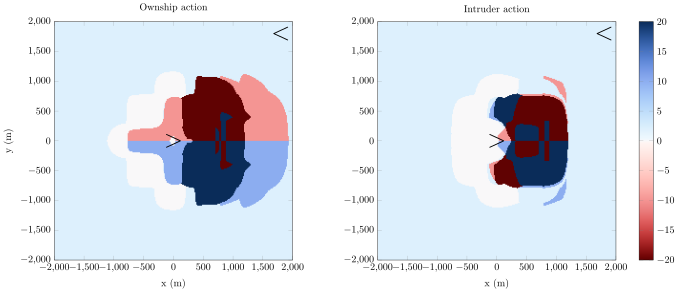

In [4]:
viz_pairwise_policy(d, alpha)

### Multithreat coordination
The code here uses the pairwise encounter solution from above to generate locally optimal policies in real-time. Basic visualization and trajectory simulation and plotting are demonstrated below.
#### Visualize example three-aircraft encounter policy heatmap
Note that `iutilFn = 1` correponds to the max-min policy, and that `iutilFn = 2` corresponds to the max-sum policy.

In [5]:
viz_policy(alpha, g)

LoadError: `viz_policy` has no method matching viz_policy(::Array{Float64,2}, ::RectangleGrid)
while loading In[5], in expression starting on line 1

#### Four-aircraft encounter simulation with trajectory visualization
Change the arguments to the desired coordination or baseline algorithm and utility function.

number of collisions = 0, average decision time = 1.230e+01 ms

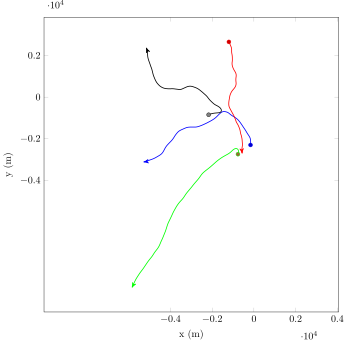

In [6]:
algorithm = utm # input utm, uncrd, coord, naive (closest-threat), or distr
utility = maxmin # input maxmin or maxsum
plot_trajs(algorithm, utility, alpha, g)

#### Bulk stress tests

In [7]:
nuavs = 2:5
nsim = 10
bulk_test(nuavs, nsim, alpha, g)

beginning stress tests...
nuavs = 2: cputime = 1.02e+01 sec
maxmin nlms bool: [0,0,0,0,0]
maxmin alerts: [1948,1969,1963,1948,1968]
maxsum nlms bool: [0,0,0,0,0]
maxsum alerts: [1969,1952,1959,1949,1947]
nuavs = 3: cputime = 1.45e+01 sec
maxmin nlms bool: [0,0,0,1,0]
maxmin alerts: [2905,2885,2924,2873,2904]
maxsum nlms bool: [0,0,0,2,0]
maxsum alerts: [2880,2930,2925,2872,2938]
nuavs = 4: cputime = 2.07e+01 sec
maxmin nlms bool: [0,0,0,0,0]
maxmin alerts: [3798,3844,3865,3727,3807]
maxsum nlms bool: [0,0,0,1,0]
maxsum alerts: [3871,3887,3895,3684,3877]
nuavs = 5: cputime = 2.57e+01 sec
maxmin nlms bool: [0,0,0,2,0]
maxmin alerts: [4648,4755,4766,4589,4733]
maxsum nlms bool: [0,0,0,1,0]
maxsum alerts: [4797,4732,4789,4665,4751]
Results saved to ../data/results-1.jld
